In [1]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "true"
from tir_lib import *
from globals import *
import time
import importlib
import pandas as pd
import math
from tqdm import tqdm
import json
import sys
from utils import *

# MATH_HINTS = {
#     "complex calculation hint": "Wait, I can use Python to perform these complex calculations for this problem.```python\n",
#     "self reflection hint": "Wait, I can use Python to check if my approach is correct and refine it, if necessary.```python\n",
#     "general hint": "Wait, using python here may be a good idea.```python\n",
#     "alternative method hint": "Alternatively, I can use Python to explore an alternative method for solving this problem.```python\n",
#     "explore deeply hint": "Wait, I can explore deeply about this problem through python tools.```python\n",
#     "use python again hint": """Wait, I need to utilize Python code again to meticulously check to make sure I understand the question correctly as well as reasoning correctly.```python\n""",
# #     "check logic hint": "Maybe Python can assist in ensuring our logical deductions are sound.```python\n",
# #     "algebraic manipulation hint": "Wait, I can use Python to handle the algebraic manipulation and simplify the expression.```python\n",
# #     "solve equations hint": "Wait, I can use Python to solve this equation.```python\n",
# #     "series or sequences hint": "Wait, I can use Python to compute the terms of this series or sequence and identify patterns.```python\n",
# #     "validate assumption hint": "Wait, I can use Python to validate the assumptions I made in this calculation.```python\n",
# }

################## CONFIG #######
input_json = "FINALE_wrongs_part1_samples.json"
target_TIR_json = "TIR_FULL_RESPONSES_part_1_round_0.json"
not_worked_json = "AFTER_ROUND_part_1_round_0.json"

def read_json_1(input_json):
    with open(input_json, "r") as f:
        data = json.load(f)
        return data
        
TIR_FULL_RESPONSES = []
AFTER_ROUND_RESPONSES = []
#################################
data_list = read_json_1(input_json)
N = len(data_list)
print(f"samples = {N}")
all_q = [item["problem"] for item in data_list]
all_r = [item["outputs"] for item in data_list]
all_a = [item["answer"] for item in data_list]

/opt/conda/lib/python3.11/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


samples = 11125


In [2]:
#################################
def get_tir(q,r,a):
    length_response = get_length(r)
    code_generated_freq = r.count("```python")
    output_generated_freq = r.count("```output")
    ########### IF CODE IS PRESENT ######################
#     if code_generated_freq == output_generated_freq + 1:
# #         resp = get_code_completion(q, r)
#         new_r = r + "```"
#         resp_with_output = add_output_at_end(new_r)
#         added_response, real_tir = get_extra_completion(q, resp_with_output)
#         full_response = resp_with_output + added_response
    if code_generated_freq > 0:
            added_r = insert_hint(q,r)
            if added_r is None:
                return False
            resp = get_code_completion(q, added_r)
            new_r = added_r + resp + "```"
            resp_with_output, real_tir = add_output_at_end(new_r)
            added_response = get_extra_completion(q, resp_with_output)
            full_response = resp_with_output + added_response
    ########### IF CODE IS NOT PRESENT ######################
    elif code_generated_freq == 0:
        choice = random.choices([1,0], weights = [0.1, 0.9], k = 1)[0]
        if choice or length_response < 3200:
            added_r = add_prompt_at_end(r)
            resp = get_code_completion(q, added_r)
            new_r = added_r + resp + "```"
            resp_with_output, real_tir = add_output_at_end(new_r)
            if real_tir:
                added_response = get_extra_completion(q, resp_with_output)
                full_response = resp_with_output + added_response
            else:
                return False
        if length_response > 3200 - 1:
            added_r = insert_hint(q,r)
            if added_r is None:
                return False
            resp = get_code_completion(q, added_r)
            new_r = added_r + resp + "```"
            resp_with_output, real_tir = add_output_at_end(new_r)
            if real_tir:
                added_response = get_extra_completion(q, resp_with_output)
                full_response = resp_with_output + added_response
            else:
                return False
            
    gen_ans = extract_boxed_texts(full_response)
    if gen_ans is None:
        return False
    elif real_tir and (gen_ans == str(a) or int(verify_correctness(gen_ans, a)[0])):
        TIR_FULL_RESPONSES.append({"q": q, "r":full_response, "a":a})
        print("TIR succeeded !")
        return True
    else:
        AFTER_ROUND_RESPONSES.append({"q": q, "r":full_response, "a":a})
        # print("TIR failed...")
        return False

In [3]:
# print(TIR_FULL_RESPONSES[1]["r"])

In [4]:
# AFTER_ROUND_RESPONSES[1]["a"]

  0%|          | 0/8 [00:00<?, ?it/s]2025-03-30 17:39:09.209227: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-30 17:39:09.265134: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-30 17:39:15.991488: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
<string>:27: RuntimeWarning: invalid value encountered in scalar divide


TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


/opt/conda/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


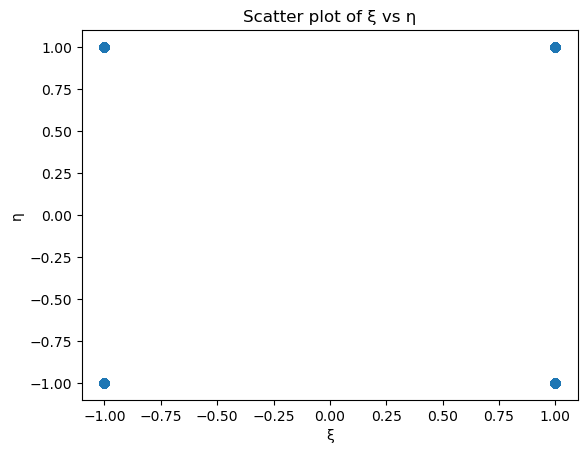

TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 12%|█▎        | 1/8 [05:48<40:42, 348.98s/it]

TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 25%|██▌       | 2/8 [11:25<34:10, 341.68s/it]

TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 38%|███▊      | 3/8 [16:20<26:42, 320.56s/it]

TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


In [ ]:
%%time
# math.ceil(len(data_list)/200)
for i in tqdm(range(math.ceil(len(data_list)/1500))):
    start = 1500*i
    end = 1500*(i+1) 
    return_val = parallelize(get_tir, all_q[start:end] , all_r[start:end], all_a[start:end])

In [ ]:
return_val

In [ ]:
print(return_val)

In [ ]:
def save_unique(dict_list, name = "xx.json"):
    json_unique = []
    st = set()
    for item in dict_list:
        if item["q"] in st:
            pass
        else:
            st.add(item["q"])
            json_unique.append(item)
    print(f"final length: {len(json_unique)}")
    with open(name, "w") as f:
        json.dump(json_unique, f , indent = 4)
        
save_unique(TIR_FULL_RESPONSES, target_TIR_json)
save_unique(AFTER_ROUND_RESPONSES, not_worked_json)